In [12]:
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# read in and format data
def strToFloat(data):
    stringNums = {string: i for i, string in enumerate(set(data))}
    return np.array([stringNums[d] for d in data])


raw_df = pd.read_csv("data.csv")
df = pd.DataFrame()

#Classift RESULT into "is_Rush","is_TD", etc...
length_of_new = len(raw_df["RESULT"])
raw_df["is_RUSH"] = raw_df["RESULT"].isin(["Rush"])
raw_df["is_TD"] = raw_df["RESULT"].isin(["TD"])
#complete, incomplete, scramble and interception are all under the play type of "pass"
raw_df["is_COMPLETE"] = raw_df["RESULT"].isin(["Complete"])
raw_df["is_INCOMPLETE"] = raw_df["RESULT"].isin(["Incomplete"])
raw_df["is_INTERCEPTION"] = raw_df["RESULT"].isin(["Interception"])
#scramble is a type of Rush
raw_df["is_SCRAMBLE"] = raw_df["RESULT"].isin(["Scramble"])
raw_df["is_PENALTY"] = raw_df["RESULT"].isin(["Penalty"])
raw_df["is_SACK"] = raw_df["RESULT"].isin(["Sack"])
raw_df["is_FUMBLE"] = raw_df["RESULT"].isin(["Fumble"])
raw_df["is_RUSHTD"] = raw_df["RESULT"].isin(["Rush, TD"])
#raw_df.drop("RESULT")
print raw_df


     PLAY # ODK   DN  DIST HASH  YARD LN PLAY TYPE RUN AREA  PASS ZONE  GN/LS  \
0        79   O  2.0  16.0    L    -29.0       Run      P-R        NaN    4.0   
1        91   O  1.0  10.0    L    -20.0       Run      P-R        NaN    1.0   
2       110   O  1.0  10.0    L    -15.0       Run      NaN        NaN   -1.0   
3        22   O  1.0   6.0  NaN      6.0       Run      NaN        NaN    6.0   
4         6   O  1.0  10.0    M     37.0       Run      P-L        NaN    4.0   
5        43   O  1.0  10.0    R     45.0       Run      P-R        NaN    4.0   
6        98   O  1.0  10.0    R     30.0       Run      P-L        NaN   10.0   
7        82   O  1.0  10.0    R    -22.0       Run      P-L        NaN   -1.0   
8        66   O  3.0   6.0    L    -11.0      Pass      NaN        4.0   21.0   
9       112   O  3.0  11.0    L    -14.0      Pass      NaN        4.0    0.0   
10        7   O  3.0  16.0    L     33.0      Pass      NaN        3.0    0.0   
11       36   O  1.0  10.0  

In [11]:
# convert strings to integer classes
for col in raw_df.columns:
    if raw_df[col].dtype == np.dtype('O'):
        df[col] = strToFloat(raw_df[col])
    else:
        df[col] = raw_df[col]
        
del raw_df

print df

# replace NaNs (missing values) with -1
df[np.isnan(df)] = -1

#classify yards gained/lost
gnls = np.array(df["GN/LS"])
gnls[gnls <= 0] = 0
gnls[gnls < 10] = 1
gnls[gnls >= 10] = 2
df["GN/LS"] = gnls
        
#drop opponent team name
df = df.drop("OPP TEAM", 1)

#drop PLAY NUMBER
df = df.drop("PLAY #", 1)

#DROP ODK (not needed, plus it's importance is 0)
df = df.drop("ODK", 1)

#DROP comments attribute
df = df.drop("comments", 1)

print df

     PLAY #  ODK   DN  DIST  HASH  YARD LN  PLAY TYPE  RUN AREA  PASS ZONE  \
0        79    0  2.0  16.0     3    -29.0          1         4        NaN   
1        91    0  1.0  10.0     3    -20.0          1         4        NaN   
2       110    0  1.0  10.0     3    -15.0          1         0        NaN   
3        22    0  1.0   6.0     0      6.0          1         0        NaN   
4         6    0  1.0  10.0     2     37.0          1        10        NaN   
5        43    0  1.0  10.0     1     45.0          1         4        NaN   
6        98    0  1.0  10.0     1     30.0          1        10        NaN   
7        82    0  1.0  10.0     1    -22.0          1        10        NaN   
8        66    0  3.0   6.0     3    -11.0          2         0        4.0   
9       112    0  3.0  11.0     3    -14.0          2         0        4.0   
10        7    0  3.0  16.0     3     33.0          2         0        3.0   
11       36    0  1.0  10.0     3     49.0          2         0 

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
train, test = train_test_split(df, test_size=0.2)

y_train = train["GN/LS"]
x_train = train
del x_train["GN/LS"]

y_test = test["GN/LS"]
x_test = test
del x_test["GN/LS"]

In [5]:

RFC = ensemble.RandomForestClassifier(n_estimators=1000, n_jobs=-1)
RFC.fit(x_train, y_train)

predicted = RFC.predict(x_test)
actual = np.array(y_test)


In [6]:
correlation = np.corrcoef(np.array([predicted, actual]))[0, 1]
print("Correlation: ", correlation)

('Correlation: ', 0.16502941877759925)


In [7]:
#get list of features, ranked by importance
importances = RFC.feature_importances_

In [8]:
indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))
    


1. feature 3 (0.162385)
2. feature 8 (0.145654)
3. feature 12 (0.104657)
4. feature 1 (0.083925)
5. feature 6 (0.081972)
6. feature 7 (0.061099)
7. feature 10 (0.057326)
8. feature 0 (0.053290)
9. feature 2 (0.048277)
10. feature 13 (0.046500)
11. feature 9 (0.037165)
12. feature 5 (0.036824)
13. feature 11 (0.029703)
14. feature 4 (0.024361)
15. feature 15 (0.014373)
16. feature 14 (0.012489)


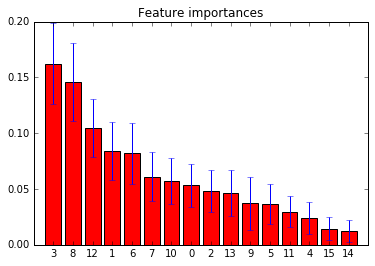

In [9]:
std = np.std([tree.feature_importances_ for tree in RFC.estimators_],
            axis=0)
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color = "r",
             yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()